***Libraries***

In [3]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py

***Stock Qoute(s)***

In [4]:
VMW = web.DataReader('VMW', data_source='yahoo', start='2012-01-01', end='2020-08-13')
VMW

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,85.870003,82.070000,84.699997,82.269997,2633800.0,68.343628
2012-01-04,82.550003,80.160004,81.639999,81.669998,2434700.0,67.845192
2012-01-05,82.839996,81.519997,81.760002,82.309998,2888000.0,68.376854
2012-01-06,84.330002,82.470001,82.959999,83.309998,1922800.0,69.207581
2012-01-09,85.169998,82.940002,83.449997,84.949997,1841200.0,70.569969
...,...,...,...,...,...,...
2020-08-07,144.039993,140.800003,143.729996,142.309998,630200.0,142.309998
2020-08-10,142.679993,139.250000,142.309998,141.460007,726700.0,141.460007
2020-08-11,143.389999,140.570007,141.820007,140.869995,609400.0,140.869995


In [6]:
VMW.shape

(2168, 6)

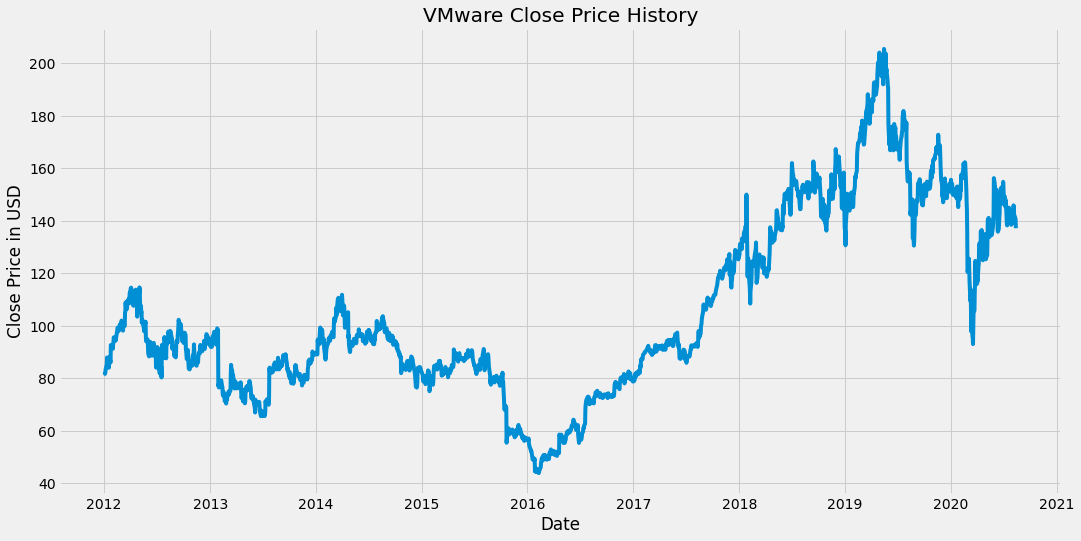

In [8]:
plt.figure(figsize=(16,8))
plt.title('VMware Close Price History')
plt.plot(VMW['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price in USD')
plt.show()

***DataFrame with only the Close information***

In [17]:
VM_D = VMW.filter(['Close'])
VM_Data = VM_D.values # numpy array
tng_l = math.ceil(len(VM_Data)*0.8)
tng_l

1735

***Scale the Data***

In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
scaledVMdata = scaler.fit_transform(VM_Data)
scaledVMdata

array([[0.23769171],
       [0.23398068],
       [0.23793912],
       ...,
       [0.60013602],
       [0.5992083 ],
       [0.57731315]])

In [19]:
#Scaled Training Data
train_data = scaledVMdata[0:tng_l,:]
#Data splits
x_tng = []
y_tng = []

for i in range(60, len(train_data)):
    x_tng.append(train_data[i-60:i, 0]) # creates 60 X variables which are the features
    y_tng.append(train_data[i, 0]) # label is the 61st variable (next day)
    # if i<= 60: # Use to observe how this works, but do not run in code
        # print(x_tng)
        # print(y_tng)
        # print()

In [20]:
x_tng

[array([0.23769171, 0.23398068, 0.23793912, 0.24412417, 0.25426766,
        0.25643247, 0.27263729, 0.27238988, 0.25742206, 0.24839188,
        0.25742206, 0.27195693, 0.27387433, 0.26076199, 0.30195449,
        0.2988001 , 0.29743938, 0.29954228, 0.29273872, 0.29335722,
        0.30486143, 0.30881986, 0.32001485, 0.31587087, 0.3198293 ,
        0.3115413 , 0.31815931, 0.31321129, 0.32712767, 0.33195201,
        0.33201382, 0.34283767, 0.34184809, 0.3355393 , 0.33832261,
        0.34500248, 0.35056899, 0.35019791, 0.34852796, 0.34048737,
        0.35953736, 0.35285748, 0.34617761, 0.33578671, 0.34741465,
        0.35112567, 0.35056899, 0.34710538, 0.37877289, 0.38130873,
        0.4023998 , 0.39132854, 0.38941119, 0.38737011, 0.40580155,
        0.4009154 , 0.40202866, 0.41136811, 0.40023504, 0.4004824 ]),
 array([0.23398068, 0.23793912, 0.24412417, 0.25426766, 0.25643247,
        0.27263729, 0.27238988, 0.25742206, 0.24839188, 0.25742206,
        0.27195693, 0.27387433, 0.26076199, 0.

In [21]:
y_tng

[0.4244185872299237,
 0.42386195477323535,
 0.4364176124153009,
 0.4372216528043746,
 0.4275729793825385,
 0.4323973160934566,
 0.42472785894246484,
 0.4114918412833993,
 0.3944210714547188,
 0.40345124863971055,
 0.42454231479023535,
 0.40301829655509575,
 0.412234017892317,
 0.41718208216354674,
 0.4323973160934566,
 0.4168728104510056,
 0.3938643918097923,
 0.36887680408597284,
 0.3887308305745713,
 0.4148935941801613,
 0.42410936270562066,
 0.41984165845139104,
 0.4254700355513826,
 0.43777833244930103,
 0.4244185872299237,
 0.3969569201822513,
 0.39435920767456284,
 0.3787110216600383,
 0.3803191496264237,
 0.35465115469736613,
 0.3617021156115136,
 0.3514967625447512,
 0.35823849893459575,
 0.34475507334314487,
 0.3408584573933741,
 0.334364176124153,
 0.35582633057913676,
 0.3528574825787513,
 0.356754051340284,
 0.3190870784140873,
 0.31036612575339856,
 0.315747142109243,
 0.3146338300076282,
 0.30411925241656274,
 0.28216228209680844,
 0.2751731849628167,
 0.28970805887572654

In [22]:
x_tng, y_tng = np.array(x_tng), np.array(y_tng) # convert to numpy arrays
x_tng.shape

(1675, 60)

In [23]:
x_tng = np.reshape(x_tng, (x_tng.shape[0], x_tng.shape[1], 1))
x_tng.shape

(1675, 60, 1)

***Build the LSTM Neural Network Model***

In [24]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_tng.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [25]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [27]:
model.fit(x_tng, y_tng, batch_size=1, epochs=1)


Epoch 1/1
1675/1675 [==============================] - 118s 70ms/step - loss: 0.0011


***Testing Data***

In [28]:
test_data = scaledVMdata[tng_l - 60: , :]
x_test = []
y_test = VM_Data[tng_l : , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])


In [29]:
x_test = np.array(x_test)

In [30]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [33]:
pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)

In [34]:
rMSE = np.sqrt(np.mean(((pred-y_test)**2)))
rMSE

7.073068235667767

***Plot and Visualize the Model***

In [36]:
train = VM_D[:tng_l]
valid = VM_D[tng_l:]
valid['Predicted Price'] = pred

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


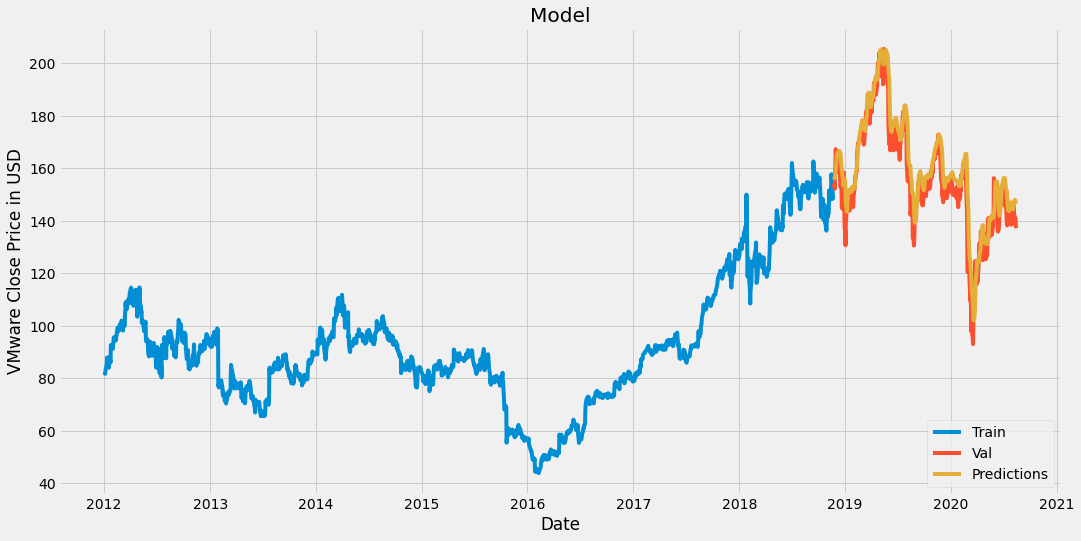

In [37]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('VMware Close Price in USD')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predicted Price']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [38]:
valid

,Close,Predicted Price
Date,,
2018-11-23,152.990005,156.834229
2018-11-26,153.910004,156.279388
2018-11-27,152.199997,156.276077
2018-11-28,159.759995,156.198730
2018-11-29,161.479996,157.580902
...,...,...
2020-08-07,142.309998,147.731583
2020-08-10,141.460007,148.003815
2020-08-11,140.869995,147.755997


***Get current Predictions***

In [39]:
#Get the quote
quote = web.DataReader('VMW', data_source='yahoo', start='2012-01-01', end='2020-08-14')
#Create a new dataframe
new_df = quote.filter(['Close'])
#Get teh last 60 day closing price 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)
#Get the quote
VMW_quote2 = web.DataReader('VMW', data_source='yahoo', start='2019-12-18', end='2020-08-14')
print(VMW_quote2['Close'])

[[143.70218]]
Date
2019-12-18    149.000000
2019-12-19    148.679993
2019-12-20    151.039993
2019-12-23    152.679993
2019-12-24    151.020004
                 ...    
2020-08-10    141.460007
2020-08-11    140.869995
2020-08-12    140.720001
2020-08-13    137.179993
2020-08-14    135.850006
Name: Close, Length: 166, dtype: float64
